The Lorenz attractor system
==============
Here we build the Lorenz system 

\begin{equation}
    \begin{aligned}
    \frac{d[X]}{dt} &= \sigma \cdot (Y - X) \\
    \frac{d[Y]}{dt} &= -X \cdot Z + r \cdot X -Y\\
    \frac{d[Z]}{dt} &= X \cdot Y - b \cdot Z\\
    \end{aligned}
\end{equation}

with initial conditions:

\begin{equation}
    X_0 = Y_0 = Z_0 = 10
\end{equation}

and parameters:

\begin{equation}
    \begin{aligned}
        \sigma &= 10\\
        r &= 46.92\\
        b &= 4\\
    \end{aligned}
\end{equation}

In [9]:
%matplotlib inline 
import site
site.addsitedir('/home/ncw135/Documents/pycotools3')

try:
    ## if using the Python 3 version
    from pycotools3 import viz, model, misc, tasks, models
except ImportError:
    ## fall back on the python 2 version 
    from pycotools import viz, model, misc, tasks, models

import os
import pandas
import seaborn
seaborn.set_style('white')
seaborn.set_context('notebook')

## turn off debugging warnings from matplotlib
import logging 
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING) 

import os

## Change cps variable to a location on your own system
wd = r'/home/ncw135/Documents/pycotools3/docs/source/Examples/lorenz_attractor'
if not os.path.isdir(wd):
    os.makedirs(wd)
cps = os.path.join(wd, 'lorenz_attractor.cps')
## Remove the file if it exists
if os.path.isfile(cps):
    os.remove(cps)

##Use the Build context manager to build the model
with model.Build(cps) as mod:
    ## name
    mod.name = 'LorenzSystem'
    
    ## add compartment
    mod.add('compartment', name='space', initial_value=1)

    ## Add metabolites to model
    mod.add('metabolite', name='X', concentration=10)
    mod.add('metabolite', name='Y', concentration=10)
    mod.add('metabolite', name='Z', concentration=10)

    ## add reactions
    mod.add('reaction', name='X', expression='-> X; Y', rate_law='sigma*(Y-X)', parameter_values={'sigma': 10})
    mod.add('reaction', name='Y', expression='-> Y; X Z', rate_law='-X*Z + r*X -Y', parameter_values={'r': 46.92})
    mod.add('reaction', name='Z', expression='-> Z; X Y', rate_law='X*Y - b*Z', parameter_values={'b': 4})



## Get handle to the model
lorenz = model.Model(cps)

# lorenz.open()

## Run TimeCourse
TC = tasks.TimeCourse(
        lorenz, end=10,
        step_size=0.001, intervals=1000
    )
viz.Parse(TC).data

,Time,X,Y,Z
0,0.000,10.00000,10.00000,10.0000
1,0.001,10.00180,10.35870,10.0617
2,0.002,10.00710,10.71660,10.1267
3,0.003,10.01600,11.07370,10.1952
4,0.004,10.02830,11.43020,10.2670
5,0.005,10.04400,11.78600,10.3423
6,0.006,10.06310,12.14140,10.4210
7,0.007,10.08550,12.49640,10.5033
8,0.008,10.11130,12.85100,10.5891
9,0.009,10.14030,13.20540,10.6785


# Visualization
## Time on x axis

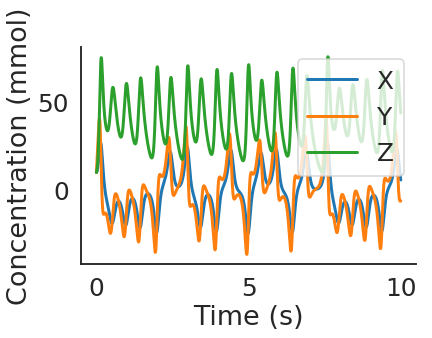

In [7]:
## Plot time courses
viz.PlotTimeCourse(TC,
    savefig=True, separate=False,
    filename='lorenz.png', x='Time'
)

## Phase Space Plots

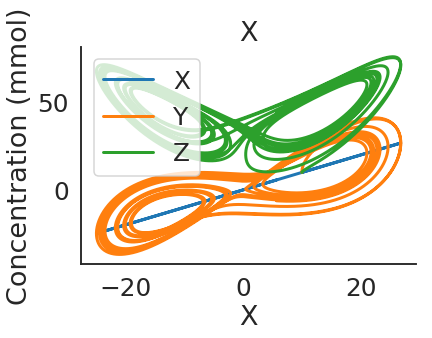

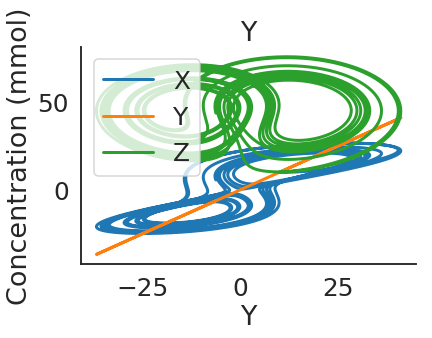

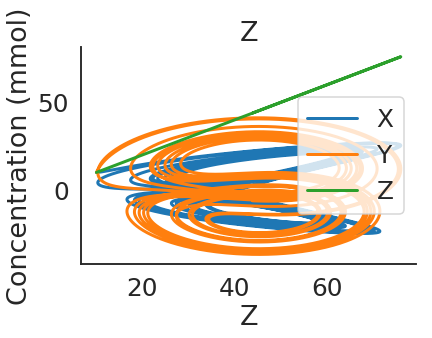

In [8]:
## Plot time courses
[viz.PlotTimeCourse(TC,
    savefig=True, separate=False,
    filename='lorenz.png', x=i, title=i) for i in ['X', 'Y', 'Z']]